### Activation functions:
    Why do we need activation functions?
    
       If all the activations in the neural network was made to be linear i e just linear activation functions, then the whole network will just a linear regression. linearfunc(linearfunction) = linear function. MOdel will only be able to learn the linearly separable problems. For that, rather than neural we might as well just use linear regression. It can't at all learn complex problems or complex data like piecewise linear problems or spiral problems and so on.
    
    Linear activation function
    ----------------------------
                        z = w.x + b (linear regression)
                        g(z) = z 
        (implies the activation of a neuron g(z) is just the z itself)
        (sometimes no activation also refers to it as using linear activation function)
        Use it when the neuron output or the final output is continuous and can be +ve or -ve as z = w.x + b can range from -inf to +inf
        Note: if all the activations in the neural network was made to be linear, then the whole network will just a linear regression. linearfunc(linearfunction) = linear function
        
     Sigmoid activation function
     ---------------------------
                        z = w.x + b
                        g(z) = sigmoid(z) = 1 / (1 + e^-z)
            
        Use it when the neuron output or the final output is binary and categorical
        Sigmoid function will output either 0 or 1
        but this will lead to slow computation of gradient descent. Also since the function is flat at both the ends(visualise the graph of sigmoid), the gradient descent algorithm may be slow and suffer to converge because the cost will have many local flat minima's(cost vs w plot)
        
      ReLU activation function
      ------------------------
                       z = w.x + b
                       g(z) = max(0, z)
         
         -  Use it when the neuron output or the final output is contionuous and +ve
          - See the function will be off i.e flat when z is < 0 but switched on or starts to increase when z >= 0 and it increases just as z increase.( __/ ) 
          - Simple as it is just a max function. Gradient descent optimization is fast and the plot wont be wiggly as it has only one flat end.
          - ReLu itself is a piecewise linear function and it better handles the complex data compared to logistic regression(sigmoid activation) or linear regression(linear activation)
          - Specially it can handle the piecewise linear data
          - Each neuron in the network with ReLU will be responsible for fitting one piece of the piecewise linear data
          - The neuron will be turned off once the other neuron is turned on
          
      The example from the lecture(shirt gonna be best selling or not based on price, marketing, availability..) shows an application of the ReLU. In this example, imagine the derived "awareness" from marketing feature is not binary but has a continuous range of values. The sigmoid is best for on/off or binary situations. The ReLU provides a continuous linear relationship. Additionally it has an 'off' range where the output is zero(when z<0, g(z)=0). The "off" feature makes the ReLU a Non-Linear activation. Why is this needed?
       
       Why Non-Linear Activations?
        The function(true data) shown is composed of linear pieces (piecewise linear). 
        
        ReLU itself is also a piecewise linear function (it changes direction at x=0), and this property is “inherited” by function that is addition of any number of ReLU functions. For example, you have 2 ReLUs: ReLU(x) and ReLU(x−1)


    ReLU(x) turns at x=0, ReLU (x−1) turns at x = 1. If you add the two up, the resulting ReLU(x) + ReLU(x−1) will turn(transiion) at x = 0 first, then turn at x = 1 again, so the moment to turn is decided by the parameters w and b in ReLU(wx + b), and those parameters are changed by gradient descent.
    
    Notes:
    --------
    Relu turns on when z = w.x + b is either 0 or >0. Here x and x-1 represents the function z. for Relu(x) w is 1 and b is 0, for relu(x-1) the w is 1 and b=-1
        
     The slope is consistent during the linear portion and then changes abruptly at transition points. 
        
     "transition point" means the turning point that ReLU starts to output non-zero value, which means ReLU(0 or z>0)
        
      At transition points, a new linear function(may be the function of next neuron) is added which, when added to the existing function(neuron), will produce the new slope. The new function is added at transition point but does not contribute to the output prior to that point. 
        
        The non-linear activation function is responsible for disabling the input prior to and sometimes after the transition points. 
        
        “prior to and sometimes after the transition points”: if our input feature is x, and we have w=1 and for now make b=0, then we have ReLU(x) so that it disables any input “to the left” of the transition point, or x < 0. If we have w = −1, then we have ReLU(−x) which will disable any input “to the right” of the transition point, or x > 0 bcz Relu(- pos num) = 0

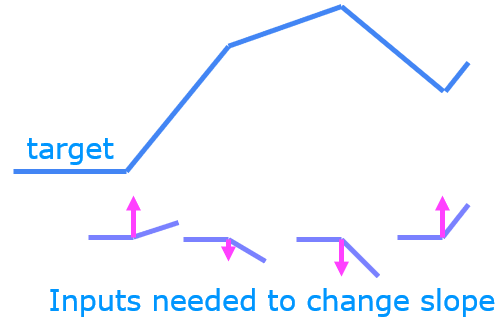

    Leaky Relu is another version derived from Relu to overcome the problem of "dying Relu" which essentially means the negative inputs are always leading to same output i.e zero. Hence Leaky Relu introduces where negative z is not zero.
    
    Tanh is another activation just like sigmoid, but it ranges from -1 to 1.
    
    Both tanh and sigmoid suffers from vanishing gradients problems where after several epochs, the gradients in the network will be infinitesimally small

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, LeakyReLU
from tensorflow.keras.activations import linear, sigmoid, relu, tanh, swish
from tensorflow.keras.losses import BinaryCrossentropy, MeanSquaredError, SparseCategoricalCrossentropy
from tensorflow.keras import Sequential
from matplotlib.widgets import Slider
from matplotlib import gridspec
%matplotlib widget

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# Set the logging level to INFO (other options: DEBUG, WARNING, ERROR, CRITICAL)
#logging.basicConfig(level=logging.INFO)

# Optional: You can customize the log message format
# Example format: "[%(levelname)s] %(asctime)s - %(message)s"
# The above format will display logs like: "[INFO] 2023-07-19 12:34:56,789 - This is an info message"
#logging.basicConfig(level=logging.INFO, format="[%(levelname)s] %(asctime)s - %(message)s")
#logging.basicConfig(filename="app.log", level=logging.INFO, format="[%(levelname)s] %(asctime)s - %(message)s") #when u want to save the log file to a file
# Logging messages of different levels
# logging.debug("This is a debug message")
# logging.info("This is an info message")
# logging.warning("This is a warning message")
# logging.error("This is an error message")
# logging.critical("This is a critical message")

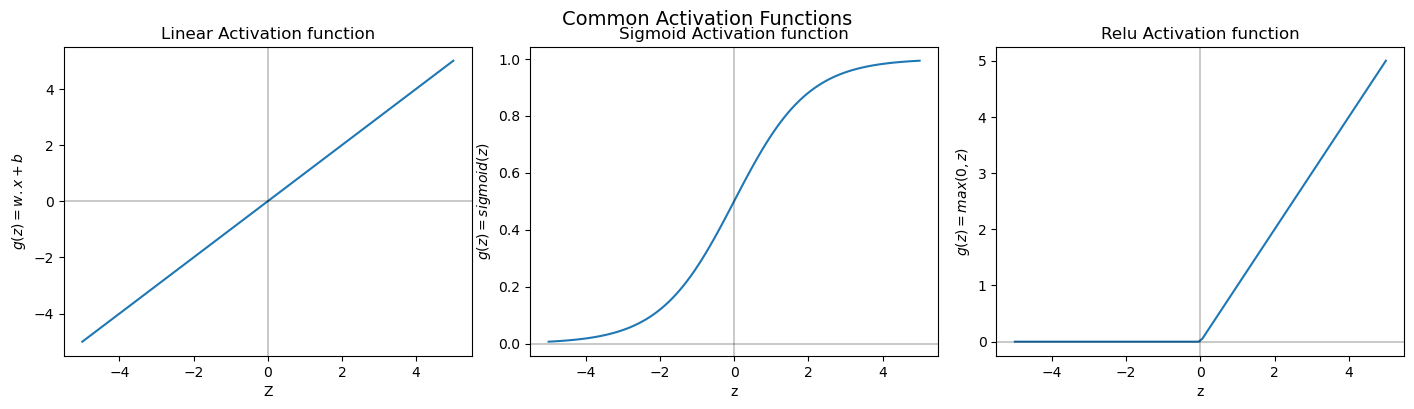

In [22]:
#plot the activation functions - Linear activation function, Sigmoid activation function, ReLU activation function
def widgvis(fig):
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
    
def plot_activations():
    z = np.linspace(-5, 5, 100) # z = w.x + b
    act_linear = tf.keras.activations.linear(z)
    act_sigmoid = tf.keras.activations.sigmoid(z)
    act_relu = tf.keras.activations.relu(z)
    fig, ax = plt.subplots(1, 3, figsize=(14, 4))
    widgvis(fig)
    ax[0].plot(z, act_linear)
    ax[0].set_xlabel("Z")
    ax[0].set_ylabel("$g(z) = w.x + b$")
    ax[0].set_title("Linear Activation function")
    ax[0].axhline(0.0, c="black", lw=0.3)
    ax[0].axvline(0.0, c="black", lw=0.3)
    
    ax[1].plot(z, act_sigmoid)
    ax[1].set_xlabel("z")
    ax[1].set_ylabel("$g(z) = sigmoid(z)$")
    ax[1].set_title("Sigmoid Activation function")
    ax[1].axhline(0.0, c="black", lw=0.3)
    ax[1].axvline(0.0, c="black", lw=0.3)
    
    ax[2].plot(z, act_relu)
    ax[2].set_xlabel("z")
    ax[2].set_ylabel("$g(z) = max(0, z)$")
    ax[2].set_title("Relu Activation function")
    ax[2].axhline(0.0, c="black", lw=0.3)
    ax[2].axvline(0.0, c="black", lw=0.3)
    fig.suptitle("Common Activation Functions", fontsize=14)
    fig.tight_layout(pad=0.2)
    plt.show()
    
plot_activations()

    The following exercise provides a more tangible example.The exercise will use the network below in a regression problem where you must model a piecewise linear target i.e the true target function is piece wise linear
    
    
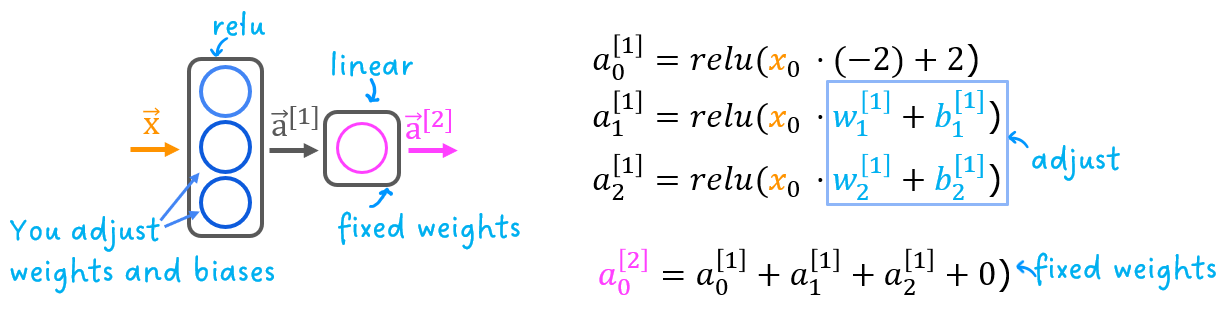

    Input X has only one feature
    
    The network has one hidden layer with 3 units. Each is required to form the target. Has an output layer with one unit. 
    
    
    Unit 0 is pre-programmed and fixed to map the first segment. You will modify weights and biases in unit 1 and 2 to model the 2nd and 3rd segment. The output unit is also fixed and simply sums the outputs of the first layer.(See the segments of the true function in the output of the below cell)
    
    To be specific,
    
    The input params to the first unit is fixed to w=-2, b =2 and we will not adjust them.
    Params for units 2 and 3 are intialized randomly and we will adjust them using sliders
    Params for output unit are fixed. i.e input a1, a2, a3 gonna have w1 , w2, w3 as 1 and b as 0 => out_act = a1 + a2 + a3
    
    The goal of this exercise is to appreciate how the ReLU's non-linear behavior provides the needed ability to turn functions(neurons) off until they are needed. Let's see how this worked in this example.
    
    Using the sliders below, modify weights and bias to match the target.
    
    Lets Start with w1 and b1 and leave w2 and b2 zero until you match the 2nd segment. Clicking rather than sliding is quicker.
    
    The plots on the right contain the output of the units of the first hidden layer. Starting at the top, unit 0 is responsible for the first segment marked with a 1 in the left side plot. Both the linear function "z" and the function following the ReLU "a" are shown. You can see that the ReLU cuts off the function after the interval [0, 1]. This is important as it prevents Unit 0 from interfering with the next following segment.
    
    Unit 1 is responsible for the 2nd segment. Here the ReLU kept this unit quiet until after x is 1. Since the first unit(unit 0) is not contributing, the slope for unit 1, w1_1, is just the slope of the target line. The bias must be adjusted to keep the output negative until x has reached 1. Note how the contribution of Unit 1 extends to the 3rd segment as well.
    
    Unit 2 is responsible for the 3rd segment. The ReLU again zeros the output until x reaches the right value.The slope of the unit w2_1, must be set so that the sum of unit 1 and 2 have the desired slope. The bias is again adjusted to keep the output negative until x has reached 2. 
    
    The "off" or disable feature of the ReLU activation enables models to stitch together linear segments to model complex non-linear functions.

In [2]:
from ipywidgets import Output
output = Output()

In [46]:
from ipywidgets import Output

# for debug
output = Output() # sends hidden error messages to display when using widgets
display(output)

[<matplotlib.lines.Line2D object at 0x0000024FC86C8310>, <matplotlib.lines.Line2D object at 0x0000024FC86C8B50>, <matplotlib.lines.Line2D object at 0x0000024FC86C8DF0>, <matplotlib.lines.Line2D object at 0x0000024FC86D60D0>, <matplotlib.lines.Line2D object at 0x0000024FC86D6370>]


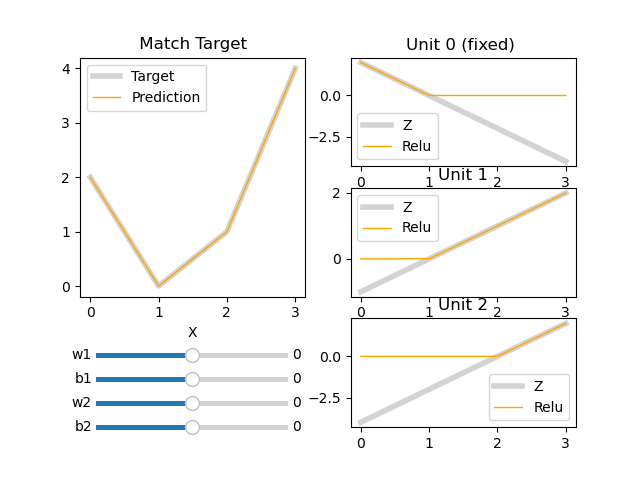

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.widgets import Slider
%matplotlib widget

def plot_unit(ax, w, b, X):
    z = np.dot(X, w) + b
    g_z = np.maximum(0, z)
    lineobj_a = ax.plot(X, z, label="Z", color="lightgray", lw=4) #Output: [<matplotlib.lines.Line2D object at 0x7f6e7e4f21f0>]
    lineobj_b = ax.plot(X, g_z, label="Relu", color="orange", lw=1)
    return (lineobj_a[0], lineobj_b[0])
    
def plot_base(ax):
    #plotting the target function in the first axes
    ax0, ax1, ax2, ax3 = ax
    X = np.linspace(0, 3, 3*100) #just to show that we are going to create 3 linear piece functions
    y = np.r_[-2 * X[0:100] + 2, 1 * X[100:200] -3 + 2, 3 * X[200:300] -7 + 2] #3 segmented piecewise linear function
    #fixed params for first unit
    w0_1 = -2.0 
    b0_1 = 2.0
    #setting params for remaining 2 units as 0 for base plot
    w1_1, b1_1, w2_1, b2_1 = 0.0, 0.0, 0.0, 0.0
#     w1_1, b1_1, w2_1, b2_1 = 1, -1, 2, -4 #final values
    
    arts = []
    
    #plotting the actual target function
    ax0.plot(X, y, color="lightgray", lw=4, label="Target")
    
    #plotting the model predicted function with relu
    arts.extend(plot_model_yhat(X, ax0, w0_1, b0_1, w1_1, b1_1, w2_1, b2_1))
    
    #plotting the first unit i.e first neuron function with relu
    _ = plot_unit(ax1, w0_1, b0_1, X) #fixed hence no need to add it to the artists to clear the plot
    
    #plotting the second unit
    arts.extend(plot_unit(ax2, w1_1, b1_1, X))
    
    #plotting the third unit
    arts.extend(plot_unit(ax3, w2_1, b2_1, X))
    return X, arts

def plot_model_yhat(X, ax, w0, b0, w1, b1, w2, b2):
    a1 = np.maximum(0, np.dot(w0, X) + b0)
    a2 = np.maximum(0, np.dot(w1, X) + b1)
    a3 = np.maximum(0, np.dot(w2, X) + b2)
    model_yhat = a1 + a2 + a3 #w0_2, w1_2, w3_2 = 1, b2 = 0 fixing the params of output activation
    line_obj = ax.plot(X, model_yhat, color="orange", lw=1, label="Prediction")
    return line_obj
    
def widgvis(fig):
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False

def plt_relu():
    
    fig = plt.figure()
    widgvis(fig)
    gs = GridSpec(3, 2, figure=fig)
#     fig.set_facecolor("lightgray")
    ax0 = fig.add_subplot(gs[0:2, 0])
    ax1 = fig.add_subplot(gs[0, 1])
    ax2 = fig.add_subplot(gs[1, 1])
    ax3 = fig.add_subplot(gs[2, 1])
    axes = [ax0, ax1, ax2, ax3]
    
    #creating the axes for sliders for w1, b1, w2, b2.
    #Note w0, b0 are kept constant so no sliders needed for them
    axs1 = fig.add_axes([0.15, 0.25, 0.30, 0.02]) #left pos from axes, bottom position from axes, width height
    axs2 = fig.add_axes([0.15, 0.20, 0.30, 0.02])
    axs3 = fig.add_axes([0.15, 0.15, 0.30, 0.02])
    axs4 = fig.add_axes([0.15, 0.10, 0.30, 0.02])
    
    #creating the sliders
    sw1 = Slider(axs1, "w1", valmin=-4.0, valmax=4.0, valinit=0.0, valstep=0.1)
    sb1 = Slider(axs2, "b1", valmin=-4.0, valmax=4.0, valinit=0.0, valstep=0.1)
    sw2 = Slider(axs3, "w2", valmin=-4.0, valmax=4.0, valinit=0.0, valstep=0.1)
    sb2 = Slider(axs4, "b2", valmin=-4.0, valmax=4.0, valinit=0.0, valstep=0.1)
    
    #this is needed to clear the previous figures when there is an update in the slider
    artists = []
    
    #plot the base graph for all the axes
    X, arts = plot_base(axes)
    print(arts)
    artists.extend(arts)
    
#     @output.capture()
    def update(val):
        for i in range(len(artists)):
            artist = artists[i]
            artist.remove()
        artists.clear()
        w0_1 = -2.0
        b0_1 = 2.0
        w1_1 = sw1.val
        b1_1 = sb1.val
        w2_1 = sw2.val
        b2_1 = sb2.val
        artists.extend(plot_unit(ax2, w1_1, b1_1, X))
        artists.extend(plot_unit(ax3, w2_1, b2_1, X))
        artists.extend(plot_model_yhat(X, ax0, w0_1, b0_1, w1_1, b1_1, w2_1, b2_1))
        
    #do the action when slider is changed
    sw1.on_changed(update)
    sb1.on_changed(update)
    sw2.on_changed(update)
    sb2.on_changed(update)
    
    axes[0].set_title(" Match Target ")
    axes[0].legend()
    axes[0].set_xlabel("X")
    axes[1].set_title("Unit 0 (fixed) ")
    axes[1].legend()
    axes[2].set_title("Unit 1")
    axes[2].legend() 
    axes[3].set_title("Unit 2")
    axes[3].legend()
    plt.show()  

plt_relu()

#### Piece wise linear function
    To create a piecewise linear function with three segments, you can define a function that evaluates different linear equations based on the input value. Each segment will have its own slope and intercept. Below is a Python function for a piecewise linear function with three segments.
    
    In this example, the function piecewise_linear takes x as the input value or an array of input values. It also takes x0, y0, k1, k2, and k3 as parameters to define the three segments.

    For x less than x0, the function evaluates the first segment with the slope k1. For x greater than or equal to x0, it evaluates the second segment with the slope k2. The value y0 is the output value at the breakpoint x0. Note that the functions of each segment are shifted by y0 - k * x0 to ensure continuity at the breakpoint.

    You can customize the values of x0, y0, k1, k2, and k3 to define your specific piecewise linear function with different slopes and breakpoints.

In [ ]:
#some notes on creating piece wise linear function
def piecewise_linear(x, x0, y0, k1, k2, k3):
    """
    Piecewise linear function with three segments.

    Parameters:
        x (float or array-like): Input values.
        x0 (float): Breakpoint between the first and second segments.
        y0 (float): Value at the breakpoint (y0 = f(x0)).
        k1 (float): Slope of the first segment (x < x0).
        k2 (float): Slope of the second segment (x0 <= x < x1).
        k3 (float): Slope of the third segment (x >= x1).

    Returns:
        float or array-like: Output values corresponding to the input x.

    """
    if isinstance(x, (int, float)):
        if x < x0:
            return k1 * x + y0 - k1 * x0
        elif x >= x0:
            return k2 * x + y0 - k2 * x0
    else:
        result = []
        for val in x:
            if val < x0:
                result.append(k1 * val + y0 - k1 * x0)
            elif val >= x0:
                result.append(k2 * val + y0 - k2 * x0)
        return result

# Example usage:
x_values = [0, 1, 2, 3, 4, 5]
y_values = piecewise_linear(x_values, 2, 3, 2, 1, 3)
print(y_values)
